# Chapter 4: Training Models

In [3]:
# to plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

## Linear Regression

In [4]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

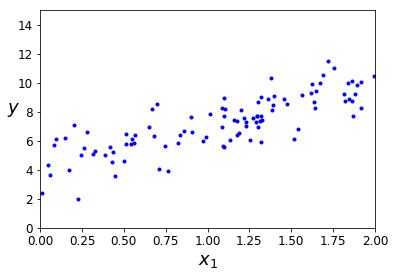

In [6]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

### The Normal Equation

The _closed-form solution_ that finds the value of $\theta$ that minimizes the cost function is called the _Normal Equation_:

$$\hat\theta = (\pmb{X}^T \cdot \pmb{X})^{-1} \cdot \pmb{X}^T \cdot \pmb{y}$$

In [9]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.17675904],
       [2.83672184]])

Make predictions using the value for $\hat\theta$:

In [12]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.17675904],
       [9.85020271]])

Plot the model's predictions:

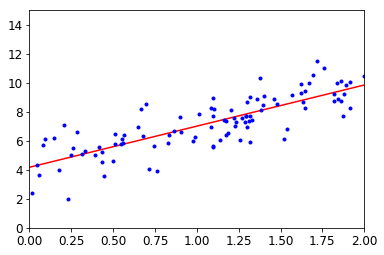

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

The equivalent code using Scikit-Learn:

In [16]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.17675904]), array([[2.83672184]]))

In [17]:
lin_reg.predict(X_new)

array([[4.17675904],
       [9.85020271]])

## Gradient Descent

The general idea of _Gradient Descent_ is to tweak parameters iteratively in order to minimize a cost function.

**TIP**: When using Gradient Descent, ensure that all features have a similar scale (e.g. using Scikit-Learn's ``StandardScaler`` class or else it will take much longer to converge.

### Batch Gradient Descent